# Movie Recommendation Systems

# Notebook 6: Evaluation & Conclusion

In [ ]:
#Run initial set up first
%run ./05_Modelling.ipynb

## 7. Evaluation

In [162]:
#Columns in 'user_items' with user recommendations
rec_cols = user_items.columns[3:]
rec_cols

Index(['content_based_rec', 'user_user_rec', 'item_item_rec', 'SVD_recs',
       'KNN_user_user_recs', 'KNN_item_item_recs'],
      dtype='object')

In [163]:
#Results for Mean Average Precision @ K (MAPk), where K = 10

#Print and store MAPk results
mapk = [] 

for rec in rec_cols: 
    mapk_ = metrics.mapk(user_items['actuals'], user_items[rec], k=10)
    print(rec, ': ', mapk_)
    mapk.append(mapk_)

content_based_rec :  0.015292674993494666
user_user_rec :  0.15085125398064508
item_item_rec :  0.014754098360655738
SVD_recs :  0.6797903253286742
KNN_user_user_recs :  0.6779644718391303
KNN_item_item_recs :  0.6884300059580601


In [164]:
#Results dataframe
mapk = pd.DataFrame([rec_cols, mapk]).transpose()
mapk.columns = ['model', 'MAP@k, k=10']
mapk = mapk.sort_values('MAP@k, k=10')

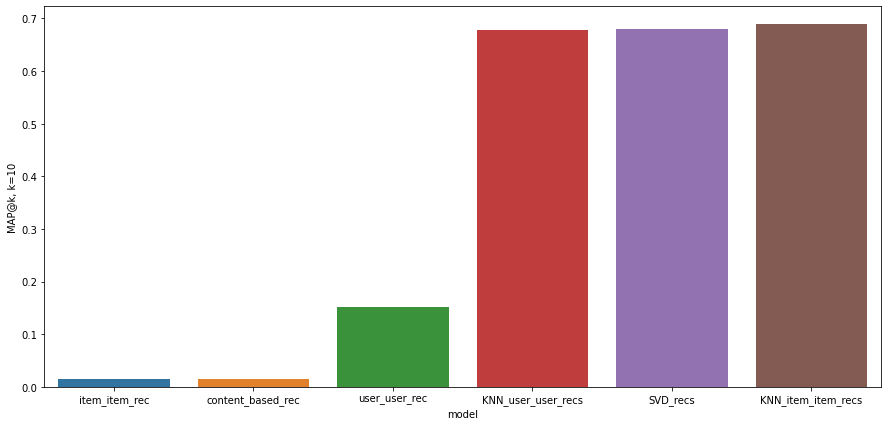

In [165]:
#Plot results  
plt.figure(figsize=(15,7))
sns.barplot(data = mapk, x='model', y= 'MAP@k, k=10')
plt.savefig('mapk.png')
plt.show()

**Findings**

*Content-based*
* Using genres only to develop content-based recommendations do not indicate a relatively high MAP@k. There was a bias to recommend movies associated with more genres listed. The recommeder could be improved by adding more attributes, such as movie cast names, directors and movie tags. 

*Recommenders built from scratch*
* The user-based recommender performed better than the item-based recommender. 
* This could be due to various reasons: 
    * There were less users than movies in the data 
    * User similarities were more distinguishable than item similarities; user similarities ranged between -1 and 1, while item similarities ranged between 0 and 1
    * The item-based recommender predicted a significant amount of zero ratings, overlooking a larger variety of movies to recommend

*Model-based recommenders*
* Performed better than recommenders built from scratch. This is likely due to the algorithms selecting only a number of user/item similarities rather than applying all users/items during computation. Given the sparsity in the user-item matrix, it is likely most users/items show insignificant levels of similarities. 
* The MAP@K, where K = 10, shows **item-item collaborative filtering using KNNBasic** performed the best on the test set, and marginally better than the other algorithms. 

## 8. Conclusion

* The Surprise algorithms performed better and had a quicker execution time than the recommenders built from scratch. 
* The MAP@K, where K = 10, shows **item-item collaborative filtering using KNNBasic** performed the best on the test set, and marginally better than the other algorithms. 